In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# `Raw Data`

In [2]:
data1 = pd.read_csv('measurements.csv')

print(f"Shape is: {data1.shape}")
data1.head()

Shape is: (388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data2 = pd.read_excel('measurements2.xlsx')

print(f"Shape is: {data2.shape}")
data2.head()

Shape is: (388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# `Concat Data`

In [4]:
data = pd.concat([data1, data2]).drop_duplicates()
data.columns = data.columns.str.lower().str.replace(' ', '_')

print(f"Shape is: {data.shape}")
data.head()

Shape is: (776, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       24
temp_outside       0
specials         590
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    750
refill_gas       750
dtype: int64

# `Cleaned Data`

In [6]:
def display_types_and_nan(df):
    display([f'{col}: {df[col].dtype} | {df[col].isna().sum()}' for col in df.columns])

def fix_float_col(cell):
    if cell == None:
        return np.nan
    if type(cell) == float:
        return cell
    else:
        return cell.replace(',', '.')
    
def transform_and_fill_nan_with_mean(df, col):
    df[col] = df[col].apply(fix_float_col).astype(float)
    mean = df[col].mean()
    return df[col].fillna(mean)

In [7]:
display_types_and_nan(data)

['distance: object | 0',
 'consume: object | 0',
 'speed: int64 | 0',
 'temp_inside: object | 24',
 'temp_outside: int64 | 0',
 'specials: object | 590',
 'gas_type: object | 0',
 'ac: int64 | 0',
 'rain: int64 | 0',
 'sun: int64 | 0',
 'refill_liters: object | 750',
 'refill_gas: object | 750']

In [8]:
data.drop(['refill_liters', 'refill_gas'], axis=1, inplace=True)
display_types_and_nan(data)

['distance: object | 0',
 'consume: object | 0',
 'speed: int64 | 0',
 'temp_inside: object | 24',
 'temp_outside: int64 | 0',
 'specials: object | 590',
 'gas_type: object | 0',
 'ac: int64 | 0',
 'rain: int64 | 0',
 'sun: int64 | 0']

In [9]:
data['distance'] = transform_and_fill_nan_with_mean(data, 'distance')
data['consume'] = transform_and_fill_nan_with_mean(data, 'consume')
data['temp_inside'] = transform_and_fill_nan_with_mean(data, 'temp_inside')
display_types_and_nan(data)

['distance: float64 | 0',
 'consume: float64 | 0',
 'speed: int64 | 0',
 'temp_inside: float64 | 0',
 'temp_outside: int64 | 0',
 'specials: object | 590',
 'gas_type: object | 0',
 'ac: int64 | 0',
 'rain: int64 | 0',
 'sun: int64 | 0']

In [10]:
data['snow'] = data['specials'].str.contains('snow')
data['snow'].fillna('Unknown', inplace=True)
display_types_and_nan(data)

['distance: float64 | 0',
 'consume: float64 | 0',
 'speed: int64 | 0',
 'temp_inside: float64 | 0',
 'temp_outside: int64 | 0',
 'specials: object | 590',
 'gas_type: object | 0',
 'ac: int64 | 0',
 'rain: int64 | 0',
 'sun: int64 | 0',
 'snow: object | 0']

In [11]:
data.drop(['specials'], axis=1, inplace=True)
display_types_and_nan(data)

['distance: float64 | 0',
 'consume: float64 | 0',
 'speed: int64 | 0',
 'temp_inside: float64 | 0',
 'temp_outside: int64 | 0',
 'gas_type: object | 0',
 'ac: int64 | 0',
 'rain: int64 | 0',
 'sun: int64 | 0',
 'snow: object | 0']

In [12]:
data.to_csv('cleaned_data_visualization.csv', index=False)

# `Check correlations`

In [13]:
def display_heatmap(dataframe):
    corr=dataframe.corr()

    mask=np.triu(np.ones_like(corr, dtype=bool))     # generate a mask for the upper triangle

    f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

    cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

    sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
                vmax=.3, center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
replace_dict_snow = {False: 0, True: 1, 'Unknown': -1}
data['snow'] = data['snow'].map(replace_dict_snow)

replace_dict_gas_type = {'E10': 0, 'SP98': 1}
data['gas_type'] = data['gas_type'].map(replace_dict_gas_type)

data.to_csv('cleaned_data_modeling.csv', index=False)

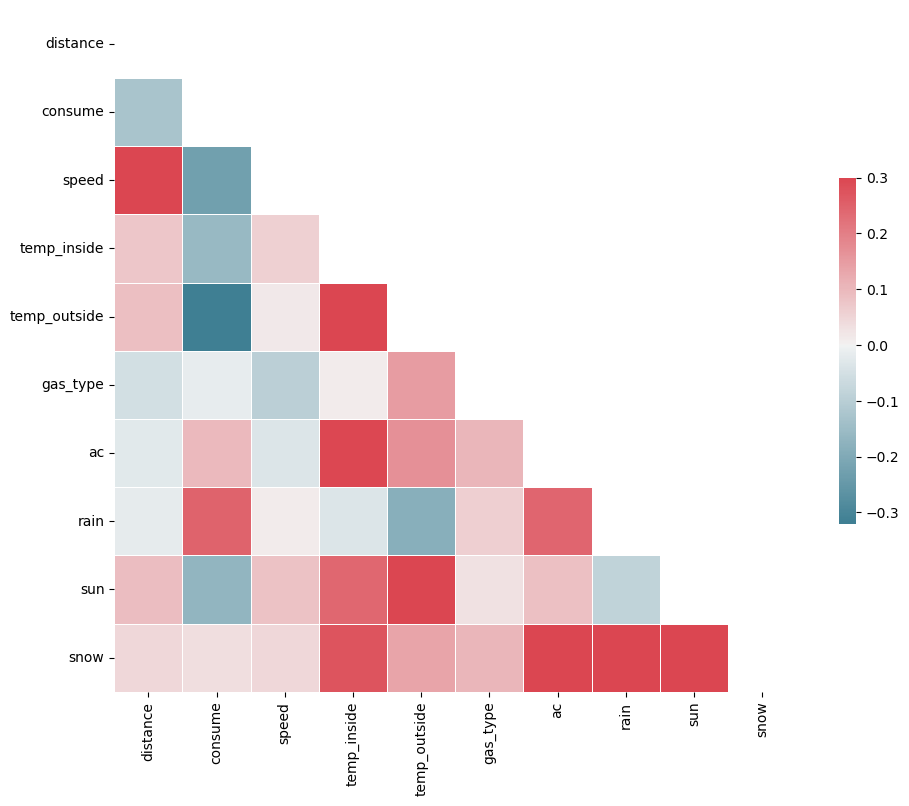

In [15]:
display_heatmap(data)